In [325]:
import numpy as np
from numpy import *
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


%matplotlib inline

def draw(pointList):
       
    

    plt.ylim(0.0, 100.0)
    plt.xlim(0.0, 100.0)
    plt.gca().set_aspect('equal', adjustable='box')

    
    xList = []
    yList = []
    for pt in pointList:
        xList.append(pt[0])
        yList.append(pt[1])
    
    plt.plot(xList, yList, 'bo-')

    
    plt.title("Billiard Trajectroy")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [326]:
#sides = 0, 1, 2, 3 (bottom, right, top, left)

In [327]:
#sides = 0, 1, 2, 3 (bottom, right, top, left)
sideLen = 100
corners = [(0,0), (sideLen, 0), (sideLen, sideLen), (0, sideLen)]

#given a side s, return its endpoints (x1 ,y1, x2, y2)

sideCoords = []
sideCoords.append([0,0, sideLen, 0])#bottom side
sideCoords.append([sideLen,0, sideLen, sideLen])#right side
sideCoords.append([sideLen,sideLen, 0, sideLen])#top side
sideCoords.append([0,sideLen, 0, 0])#left side

    

In [328]:
# input: point_i (pi), point_i+1 (pil), line_i (li), side_i (si)
# output: point_i+1 (piNew), point_i+2 (piNextNew), line_i+1 (liNew), side_i (siNew)

#siNext is the side of piNext

def getNextPoint(pi, piNext):

    temp = [sideLen, sideLen, 0, 0]
    siNext = getSide(piNext)
#     -------------------------------------------------------------------------------
    if siNext%2==1: #1, or 3
            
        newy = 0
        if piNext[1] > pi[1]:
            newy = sideLen # axis = horizontal,    expect newy=sideLen or 0
#         print("expect newy = ", newy)
        
        
        if siNext==1:
            newx = piNext[0] -  abs( (piNext[0]-pi[0]) * (newy-piNext[1]) / (piNext[1]-pi[1]) )
        else:#siNext==3
            newx = piNext[0]  +  abs( (piNext[0]-pi[0]) * (newy-piNext[1]) / (piNext[1]-pi[1]) )
            
#         print("tan = ", abs( (piNext[0]-pi[0]) / (piNext[1]-pi[1]) ))
#         print("temp newx =", newx)
        if 0 <= newx and newx <= sideLen: #si only increments one
            print("increment one")
        else:  #si increments two
            print("increment two")
            
            newx = 0
            if piNext[0] < pi[0]:
                newx = sideLen
            
            if piNext[1] > pi[1]:
                newy = piNext[1]    +   abs((piNext[1]-pi[1]) * (piNext[0] - newx) /  (piNext[0] - pi[0]))
            else:
                newy = piNext[1]    -   abs((piNext[1]-pi[1]) * (piNext[0] - newx) /  (piNext[0] - pi[0]))
    
    
#     -------------------------------------------------------------------------------
    if siNext%2==0: #2, or 0(4)

            
        newx = 0
        if piNext[0] > pi[0]:
            newx = sideLen # axis = vertical,    expect newy=sideLen or 0
        
#         print("expect newx =", newx)
        
        if siNext==2:
            newy = piNext[1] -   abs( (piNext[1]-pi[1]) * (newx-piNext[0]) / (piNext[0]-pi[0]) )
#             print("expect newy =", newy)
        else:#siNext==0
            newy = piNext[1] +   abs( (piNext[1]-pi[1]) * (newx-piNext[0]) / (piNext[0]-pi[0]) )
    
        
        if 0 <= newy and newy <= sideLen: #si only increments one
            print("increment one")
        
        else:  #si increments two
            print("increment two")
            
            newy = 0
            if piNext[1] < pi[1]:
                newy = sideLen
            
            if piNext[0] > pi[0]:
                newx = piNext[0]    +  abs((piNext[0]-pi[0]) * (piNext[1] - newy) /  (piNext[1] - pi[1]))
            else:
                newx = piNext[0]    -  abs((piNext[0]-pi[0]) * (piNext[1] - newy) /  (piNext[1] - pi[1]))
    

        
    return (newx, newy)


In [329]:
#debug
pi, piNext =   (100, 40), (0, 80.0)
getNextPoint(pi, piNext)

increment one


(50.0, 100)

In [330]:
def close(pt1, pt2):
    small = 0.05
    return abs(pt1[0]-pt2[0]) < small  and   abs(pt1[1]-pt2[1]) < small
        
def fall(newPt):
    for pt in corners:
        if close(newPt, pt):
            return True
    return False

In [331]:
def getSide(pt):
    x,y = pt
    if x==0:
        return 3
    if x==sideLen:
        return 1
    if y==0:
        return 0
    if y==sideLen:
        return 2

In [332]:
def billiard(p0, p1, ptList):
    
    pi = p0
    piNext = p1
    
    while(True):
        print("pi =", pi, "  piNext =", piNext)
        
        newx, newy = getNextPoint(pi, piNext)
        
        pi = piNext
        piNext = (newx, newy)
        ptList.append(pi)
        print("len(ptList) =", len(ptList))
        
        if fall(pi):
            print("fall pi =", pi)
            break
        

pi = (0, 0)   piNext = (100, 30.303030303030305)
increment two
len(ptList) = 2
pi = (100, 30.303030303030305)   piNext = (0, 60.60606060606061)
increment two
len(ptList) = 3
pi = (0, 60.60606060606061)   piNext = (100, 90.9090909090909)
increment one
len(ptList) = 4
pi = (100, 90.9090909090909)   piNext = (69.99999999999999, 100)
increment one
len(ptList) = 5
pi = (69.99999999999999, 100)   piNext = (0, 78.7878787878788)
increment two
len(ptList) = 6
pi = (0, 78.7878787878788)   piNext = (100, 48.4848484848485)
increment two
len(ptList) = 7
pi = (100, 48.4848484848485)   piNext = (0, 18.1818181818182)
increment one
len(ptList) = 8
pi = (0, 18.1818181818182)   piNext = (60.00000000000007, 0)
increment one
len(ptList) = 9
pi = (60.00000000000007, 0)   piNext = (100, 12.1212121212121)
increment two
len(ptList) = 10
pi = (100, 12.1212121212121)   piNext = (0, 42.42424242424241)
increment two
len(ptList) = 11
pi = (0, 42.42424242424241)   piNext = (100, 72.72727272727272)
increment one
len(

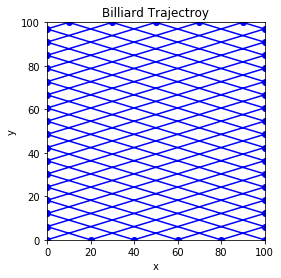

In [333]:
p0 = (0,0)
p1 = (100, 100/3.3)
s1 = getSide(p1)

ptList = [p0]

billiard(p0, p1, ptList)
print("ptList =", ptList)
draw(ptList)


In [334]:
ptList[-10:]

[(0, 12.121212121212068),
 (39.99999999999983, 0),
 (100, 18.18181818181823),
 (0, 48.48484848484853),
 (100, 78.78787878787882),
 (30.000000000000114, 100),
 (0, 90.90909090909088),
 (100, 60.60606060606059),
 (0, 30.303030303030297),
 (100, 7.105427357601002e-15)]

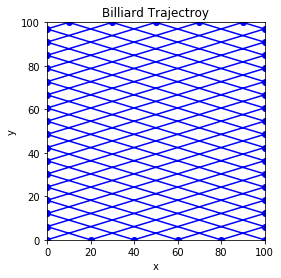

In [335]:
draw(ptList)